# Lab work #2
# Lypnytska Inna
# CS32



# The lab work task
Solve the regression problem for the one of the presented datasets using the same steps into your work.
To get you variant: (your_num % 9), where your_num is your number in the group list.

In addition to presented in the example methods consider other ML methods like Support Vector Machine, Gradient Boosting Regression, Bayesian Ridge Regression.

Present your work in the Jupyter Notebook variant

P.s. in provided data sources you can find examples of solving this problem, but be ready to explain the code and results.


# Data to choose
0. [Gold Price Prediction](https://www.kaggle.com/datasets/franciscogcc/financial-data)
1. [Possum Regression](https://www.kaggle.com/datasets/abrambeyer/openintro-possum/data)
2. [Student Performance](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
3. [Boston House Prices](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data)
4. [Car Price](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)
5. [Medical Cost](https://www.kaggle.com/datasets/mirichoi0218/insurance)
6. [Crab Age Prediction](https://www.kaggle.com/datasets/sidhus/crab-age-prediction)
7. [Calculate Concrete Strength](https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking)
8. [Advertising dataset](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset)

In [1]:
import pandas as pd

# Завантаження датасету
df = pd.read_csv("CrabAgePrediction.csv")
print(df.shape)
df.head()


(3893, 9)


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [2]:
print(df.isnull().sum())
print(df.dtypes)


Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object


In [8]:
df = pd.get_dummies(df, columns=["Sex"], drop_first=True)
df.head()



,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,True,False


In [12]:
X = df.drop("Age", axis=1)
y = df["Age"]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "BayesianRidge": BayesianRidge(),
    "SVR": SVR(),
    "GradientBoosting": GradientBoostingRegressor()
}


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }

pd.DataFrame(results).T.sort_values("R2 Score", ascending=False)


,MAE,MSE,RMSE,R2 Score
GradientBoosting,1.469401,4.418528,2.102029,0.540190
LinearRegression,1.501400,4.640688,2.154226,0.517071
Ridge,1.502699,4.649156,2.156190,0.516190
BayesianRidge,1.502989,4.651083,2.156637,0.515989
SVR,1.441701,4.671778,2.161430,0.513835
Lasso,1.930867,6.996838,2.645154,0.271880


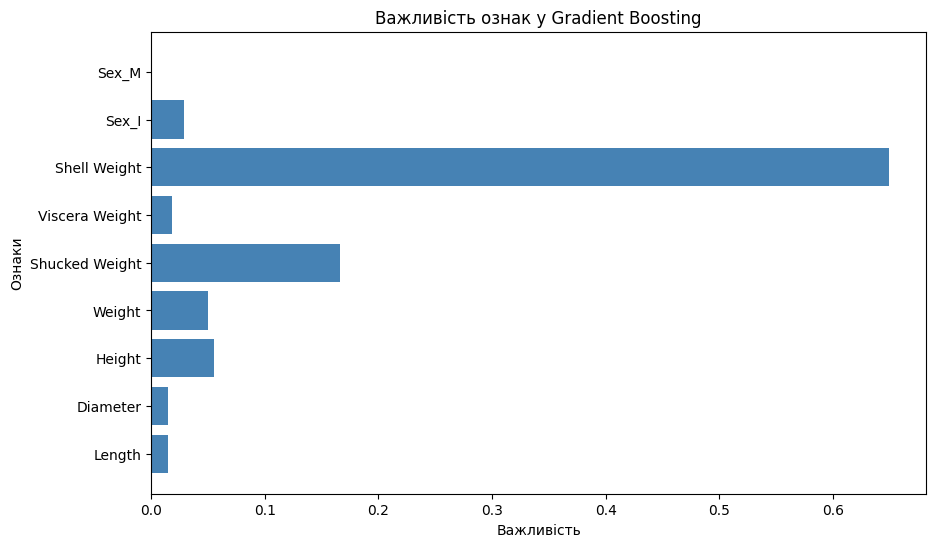

In [17]:
import matplotlib.pyplot as plt

gbr = models["GradientBoosting"]
feature_importance = gbr.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color="steelblue")
plt.xlabel("Важливість")
plt.ylabel("Ознаки")
plt.title("Важливість ознак у Gradient Boosting")
plt.show()


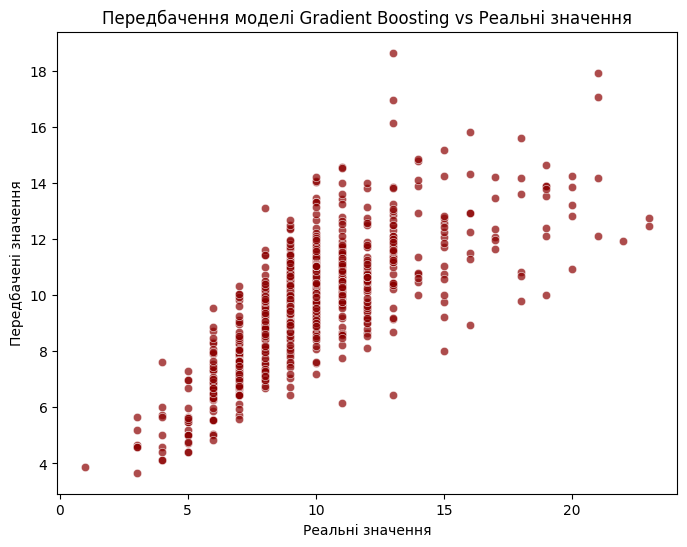

In [18]:
import seaborn as sns

y_pred_gbr = models["GradientBoosting"].predict(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr, alpha=0.7, color="darkred")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.title("Передбачення моделі Gradient Boosting vs Реальні значення")
plt.show()
